In [1]:
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import missingno as msnum

In [2]:
pd.set_option("display.max_columns", 200)
pd.set_option("display.max_row", 160)
pd.set_option('max_colwidth', 200)

In [3]:
rejected = pd.read_csv('../Data/rejected.csv')
rejected.shape

(27648741, 9)

In [4]:
rejected = rejected.rename(columns={'Risk_Score':'Risk Score'})

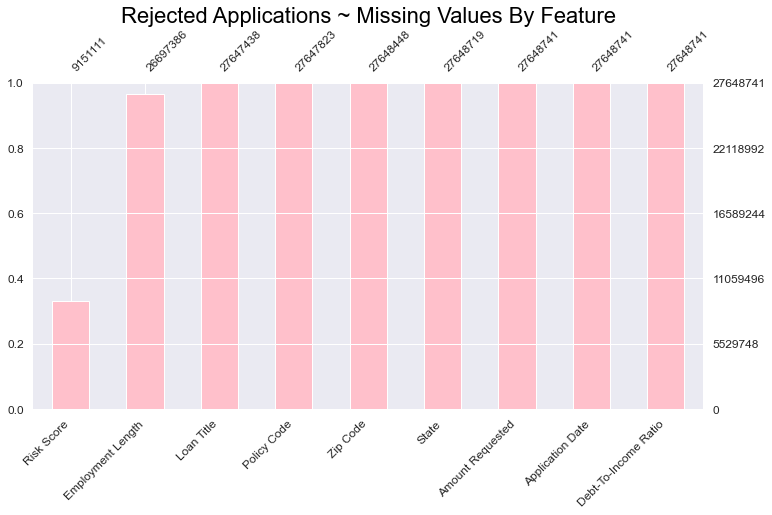

In [5]:
msnum.bar(rejected, color='pink', sort='ascending', figsize=(12,6), fontsize=12)
plt.title('Rejected Applications ~ Missing Values By Feature', size=22, color='black');
#plt.xlabel('Features', size=18)
#plt.ylabel('Values Present', size=18);
#plt.xticks(size=15, color='black')
#plt.yticks(size=15, color='red');


In [25]:
r_missing = rejected.isna().sum().to_frame(name='Rejected Applications').sort_values(by='Rejected Applications')
r_missing['Rejected Applications'] = r_missing['Rejected Applications']/1000000

r_missing

,Rejected Applications
Amount Requested,0.000000
Application Date,0.000000
Debt-To-Income Ratio,0.000000
State,0.000022
Zip Code,0.000293
Policy Code,0.000918
Loan Title,0.001303
Employment Length,0.951355
Risk Score,18.497630


<Figure size 800x400 with 0 Axes>

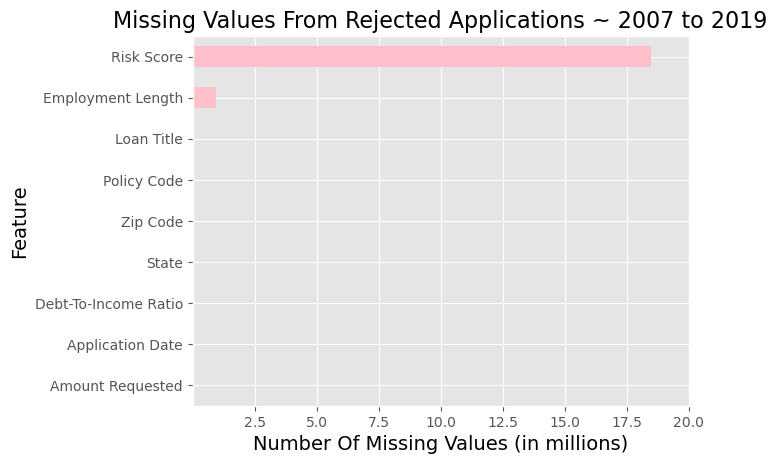

In [26]:
plt.figure(figsize=(8,4))
plt.style.use('default')
plt.style.use('ggplot')

r_missing.plot.barh(legend=False, color='pink')

plt.title('Missing Values From Rejected Applications ~ 2007 to 2019', fontsize=16, color='black')
plt.xlabel('Number Of Missing Values (in millions)', fontsize=14, color='black')
plt.ylabel('Feature', fontsize=14, color='black')
plt.xticks([2.5, 5, 7.5, 10, 12.5, 15, 17.5, 20]);
#plt.yticks([])
#plt.legend(fontsize=12);

In [9]:
accepted = pd.read_csv('../Data/accepted.csv')
accepted.shape

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(2260701, 151)

In [10]:
a = accepted[['loan_amnt', 'issue_d', 'purpose', 'fico_range_low', 
          'fico_range_high', 'annual_inc', 'emp_length', 'addr_state', 'zip_code', 'policy_code']]

a = a.assign(FICO = (a['fico_range_low'] + a['fico_range_high'])/2)
a = a.assign(DI = (a['loan_amnt'] / a['annual_inc']))

a.shape

(2260701, 12)

In [11]:
rejected.head(2)

,Amount Requested,Application Date,Loan Title,Risk Score,Debt-To-Income Ratio,Zip Code,State,Employment Length,Policy Code
0,1000.0,2007-05-26,Wedding Covered but No Honeymoon,693.0,10%,481xx,NM,4 years,0.0
1,1000.0,2007-05-26,Consolidating Debt,703.0,10%,010xx,MA,< 1 year,0.0


In [12]:
rejected.shape

(27648741, 9)

In [13]:
a = a.rename(columns={'FICO':'Risk Score', 'purpose':'Loan Title', 'loan_amnt':'Amount Requested',
                      'policy_code':'Policy Code', 'addr_state':'State', 'zip_code':'Zip Code',
                      'issue_d':'Application Date', 'emp_length':'Employment Length', 
                      'DI':'Debt-To-Income Ratio'})

In [14]:
a = a[['Amount Requested', 'Application Date', 'Loan Title', 'Risk Score', 'Debt-To-Income Ratio', 'Zip Code',
   'State', 'Employment Length', 'Policy Code']]

In [15]:
a.shape

(2260701, 9)

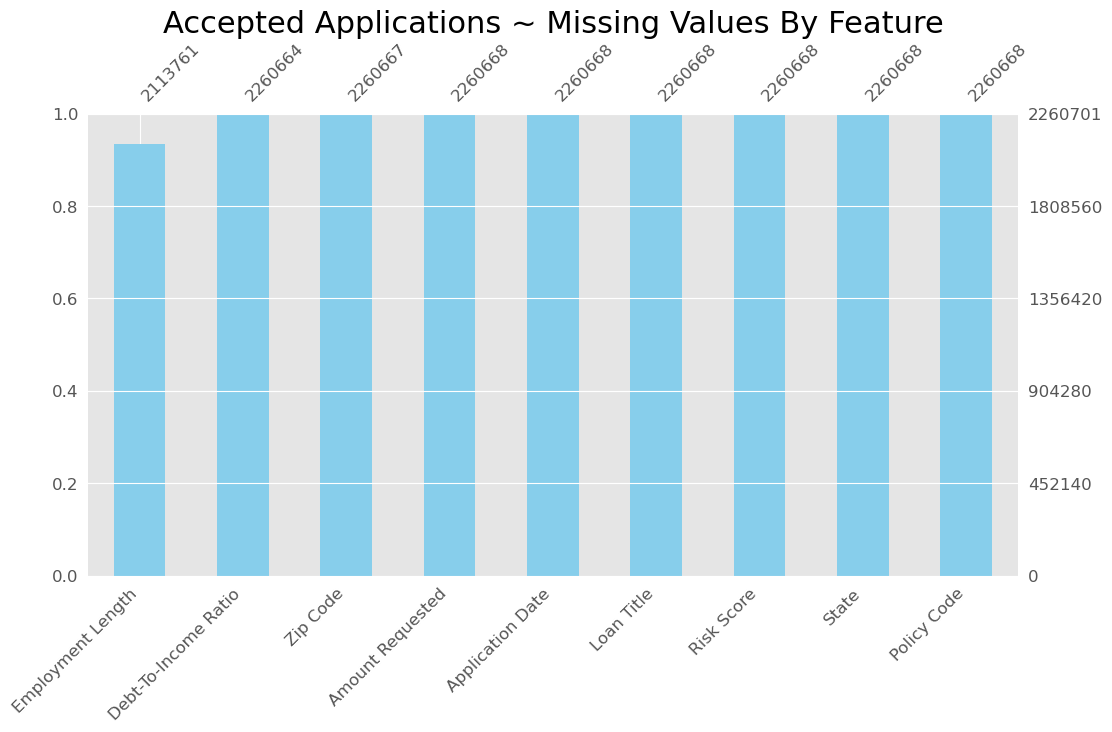

In [18]:
msnum.bar(a, color='skyblue', sort='ascending', figsize=(12,6), fontsize=12)
plt.title('Accepted Applications ~ Missing Values By Feature', size=22, color='black');

In [23]:
a_missing = a.isna().sum().to_frame(name='Accepted Applications').sort_values(by='Accepted Applications')
a_missing['Accepted Applications'] = a_missing['Accepted Applications']/1000000

a_missing

,Accepted Applications
Amount Requested,0.000033
Application Date,0.000033
Loan Title,0.000033
Risk Score,0.000033
State,0.000033
Policy Code,0.000033
Zip Code,0.000034
Debt-To-Income Ratio,0.000037
Employment Length,0.146940


<Figure size 800x400 with 0 Axes>

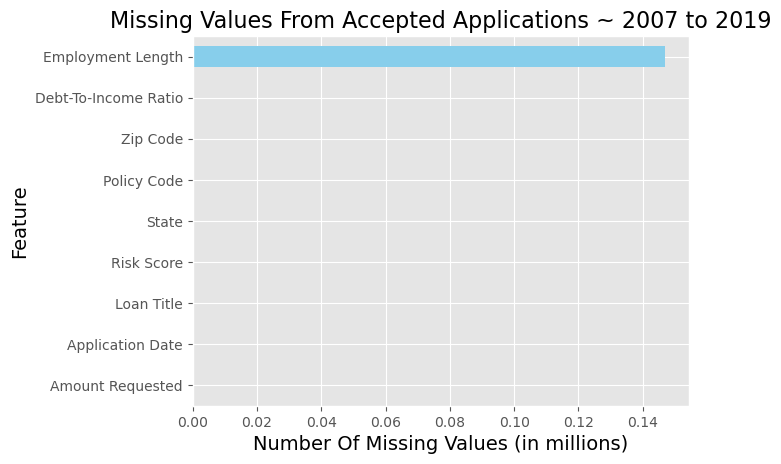

In [24]:
plt.figure(figsize=(8,4))
plt.style.use('default')
plt.style.use('ggplot')

a_missing.plot.barh(legend=False, color='skyblue')

plt.title('Missing Values From Accepted Applications ~ 2007 to 2019', fontsize=16, color='black')
plt.xlabel('Number Of Missing Values (in millions)', fontsize=14, color='black')
plt.ylabel('Feature', fontsize=14, color='black');

In [27]:
combo = pd.concat([r_missing, a_missing], axis=1)
combo

,Rejected Applications,Accepted Applications
Amount Requested,0.000000,0.000033
Application Date,0.000000,0.000033
Debt-To-Income Ratio,0.000000,0.000037
State,0.000022,0.000033
Zip Code,0.000293,0.000034
Policy Code,0.000918,0.000033
Loan Title,0.001303,0.000033
Employment Length,0.951355,0.146940
Risk Score,18.497630,0.000033


<Figure size 1200x800 with 0 Axes>

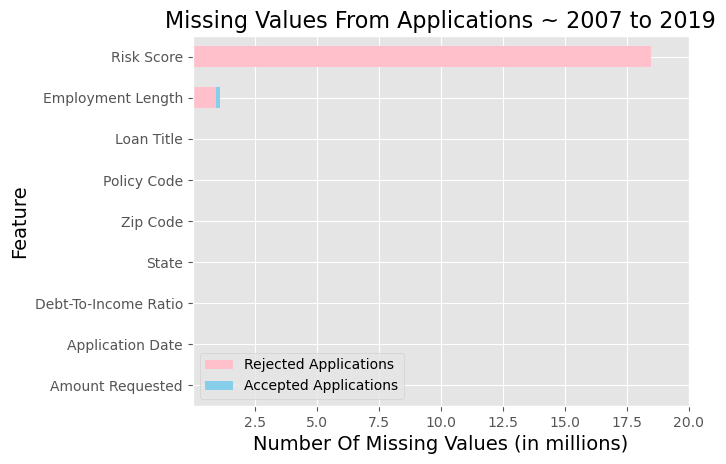

In [29]:
plt.figure(figsize=(12,8))
sns.set()

plt.style.use('default')
plt.style.use('ggplot')

combo.plot.barh(stacked=True, color={'Rejected Applications':'pink', 'Accepted Applications':'skyblue'})

plt.title('Missing Values From Applications ~ 2007 to 2019', fontsize=16, color='black')
plt.xlabel('Number Of Missing Values (in millions)', fontsize=14, color='black')

#plt.margins(0.1, 0.00)

plt.ylabel('Feature', fontsize=14, color='black')
plt.xticks([2.5, 5, 7.5, 10, 12.5, 15, 17.5, 20]);

#plt.tight_layout();
